# Hit song prediction:

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# plotly.tools.set_credentials_file(username='mtfaye', api_key='N9PkbhoY5zxhbU3LKqtb'

In [2]:
df = pd.read_csv('/Users/FayeFamilly/Desktop/hit-predictor/notebook/tracks.csv')

In [3]:
df.sample() 

,Unnamed: 0,index,duration_ms,name,popularity,track_number,acousticness,analysis_url,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
200,0,0,190440,"break up with your girlfriend, i'm bored",89,12,0.0421,https://api.spotify.com/v1/audio-analysis/4kV4...,0.726,0.554,0.0,5,0.106,-5.29,0,0.0917,169.999,4,0.335


### Preprocessing

Lets choose the inputs and output of our model: 
As the goal of this project is to predict the popularity of a song uploaded by an Artist. The variable Popularity will be definitly our output and we will verify which audio features do have a certains relationship with the popularity.

For documentation about the inputs and the ouput see link below: 
https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/


In [4]:
df.isnull().values.any()

False

In [5]:
# drop non-numeric cols
df = df.drop(['Unnamed: 0', 'index', 'analysis_url', 'name'], axis=1)
df.sample()

,duration_ms,popularity,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
209,212266,80,1,0.378,0.729,0.475,0.0,8,0.12,-4.985,1,0.0364,62.52,3,0.371


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
duration_ms         250 non-null int64
popularity          250 non-null int64
track_number        250 non-null int64
acousticness        250 non-null float64
danceability        250 non-null float64
energy              250 non-null float64
instrumentalness    250 non-null float64
key                 250 non-null int64
liveness            250 non-null float64
loudness            250 non-null float64
mode                250 non-null int64
speechiness         250 non-null float64
tempo               250 non-null float64
time_signature      250 non-null int64
valence             250 non-null float64
dtypes: float64(9), int64(6)
memory usage: 29.4 KB


In [7]:
df.describe()

,duration_ms,popularity,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,228781.784000,45.920000,7.472000,0.355375,0.638608,0.539925,0.116266,5.528000,0.184883,-7.900864,0.508000,0.133347,108.609816,3.876000,0.435319
std,60254.605318,27.525118,5.323398,0.328555,0.218442,0.258938,0.271565,3.425808,0.128843,5.385447,0.500939,0.121634,27.095154,0.495587,0.244797
min,37640.000000,0.000000,1.000000,0.000588,0.072800,0.053400,0.000000,0.000000,0.028000,-29.395000,0.000000,0.025600,51.403000,1.000000,0.036500
25%,194923.250000,27.000000,3.000000,0.053300,0.500000,0.318500,0.000000,2.000000,0.106000,-10.215750,0.000000,0.039600,91.140500,4.000000,0.233000
50%,222326.500000,53.000000,6.000000,0.221500,0.691000,0.572500,0.000007,6.000000,0.130000,-6.812500,1.000000,0.066950,101.011000,4.000000,0.430500
75%,266632.750000,68.000000,10.000000,0.692000,0.802000,0.779250,0.003035,8.000000,0.236500,-4.122000,1.000000,0.215500,123.584750,4.000000,0.628000
max,503893.000000,90.000000,24.000000,0.975000,0.947000,0.934000,0.938000,11.000000,0.681000,-0.362000,1.000000,0.471000,191.972000,5.000000,0.962000


### Features: 

In [8]:
# gather features
X = df.drop('popularity', axis=1)

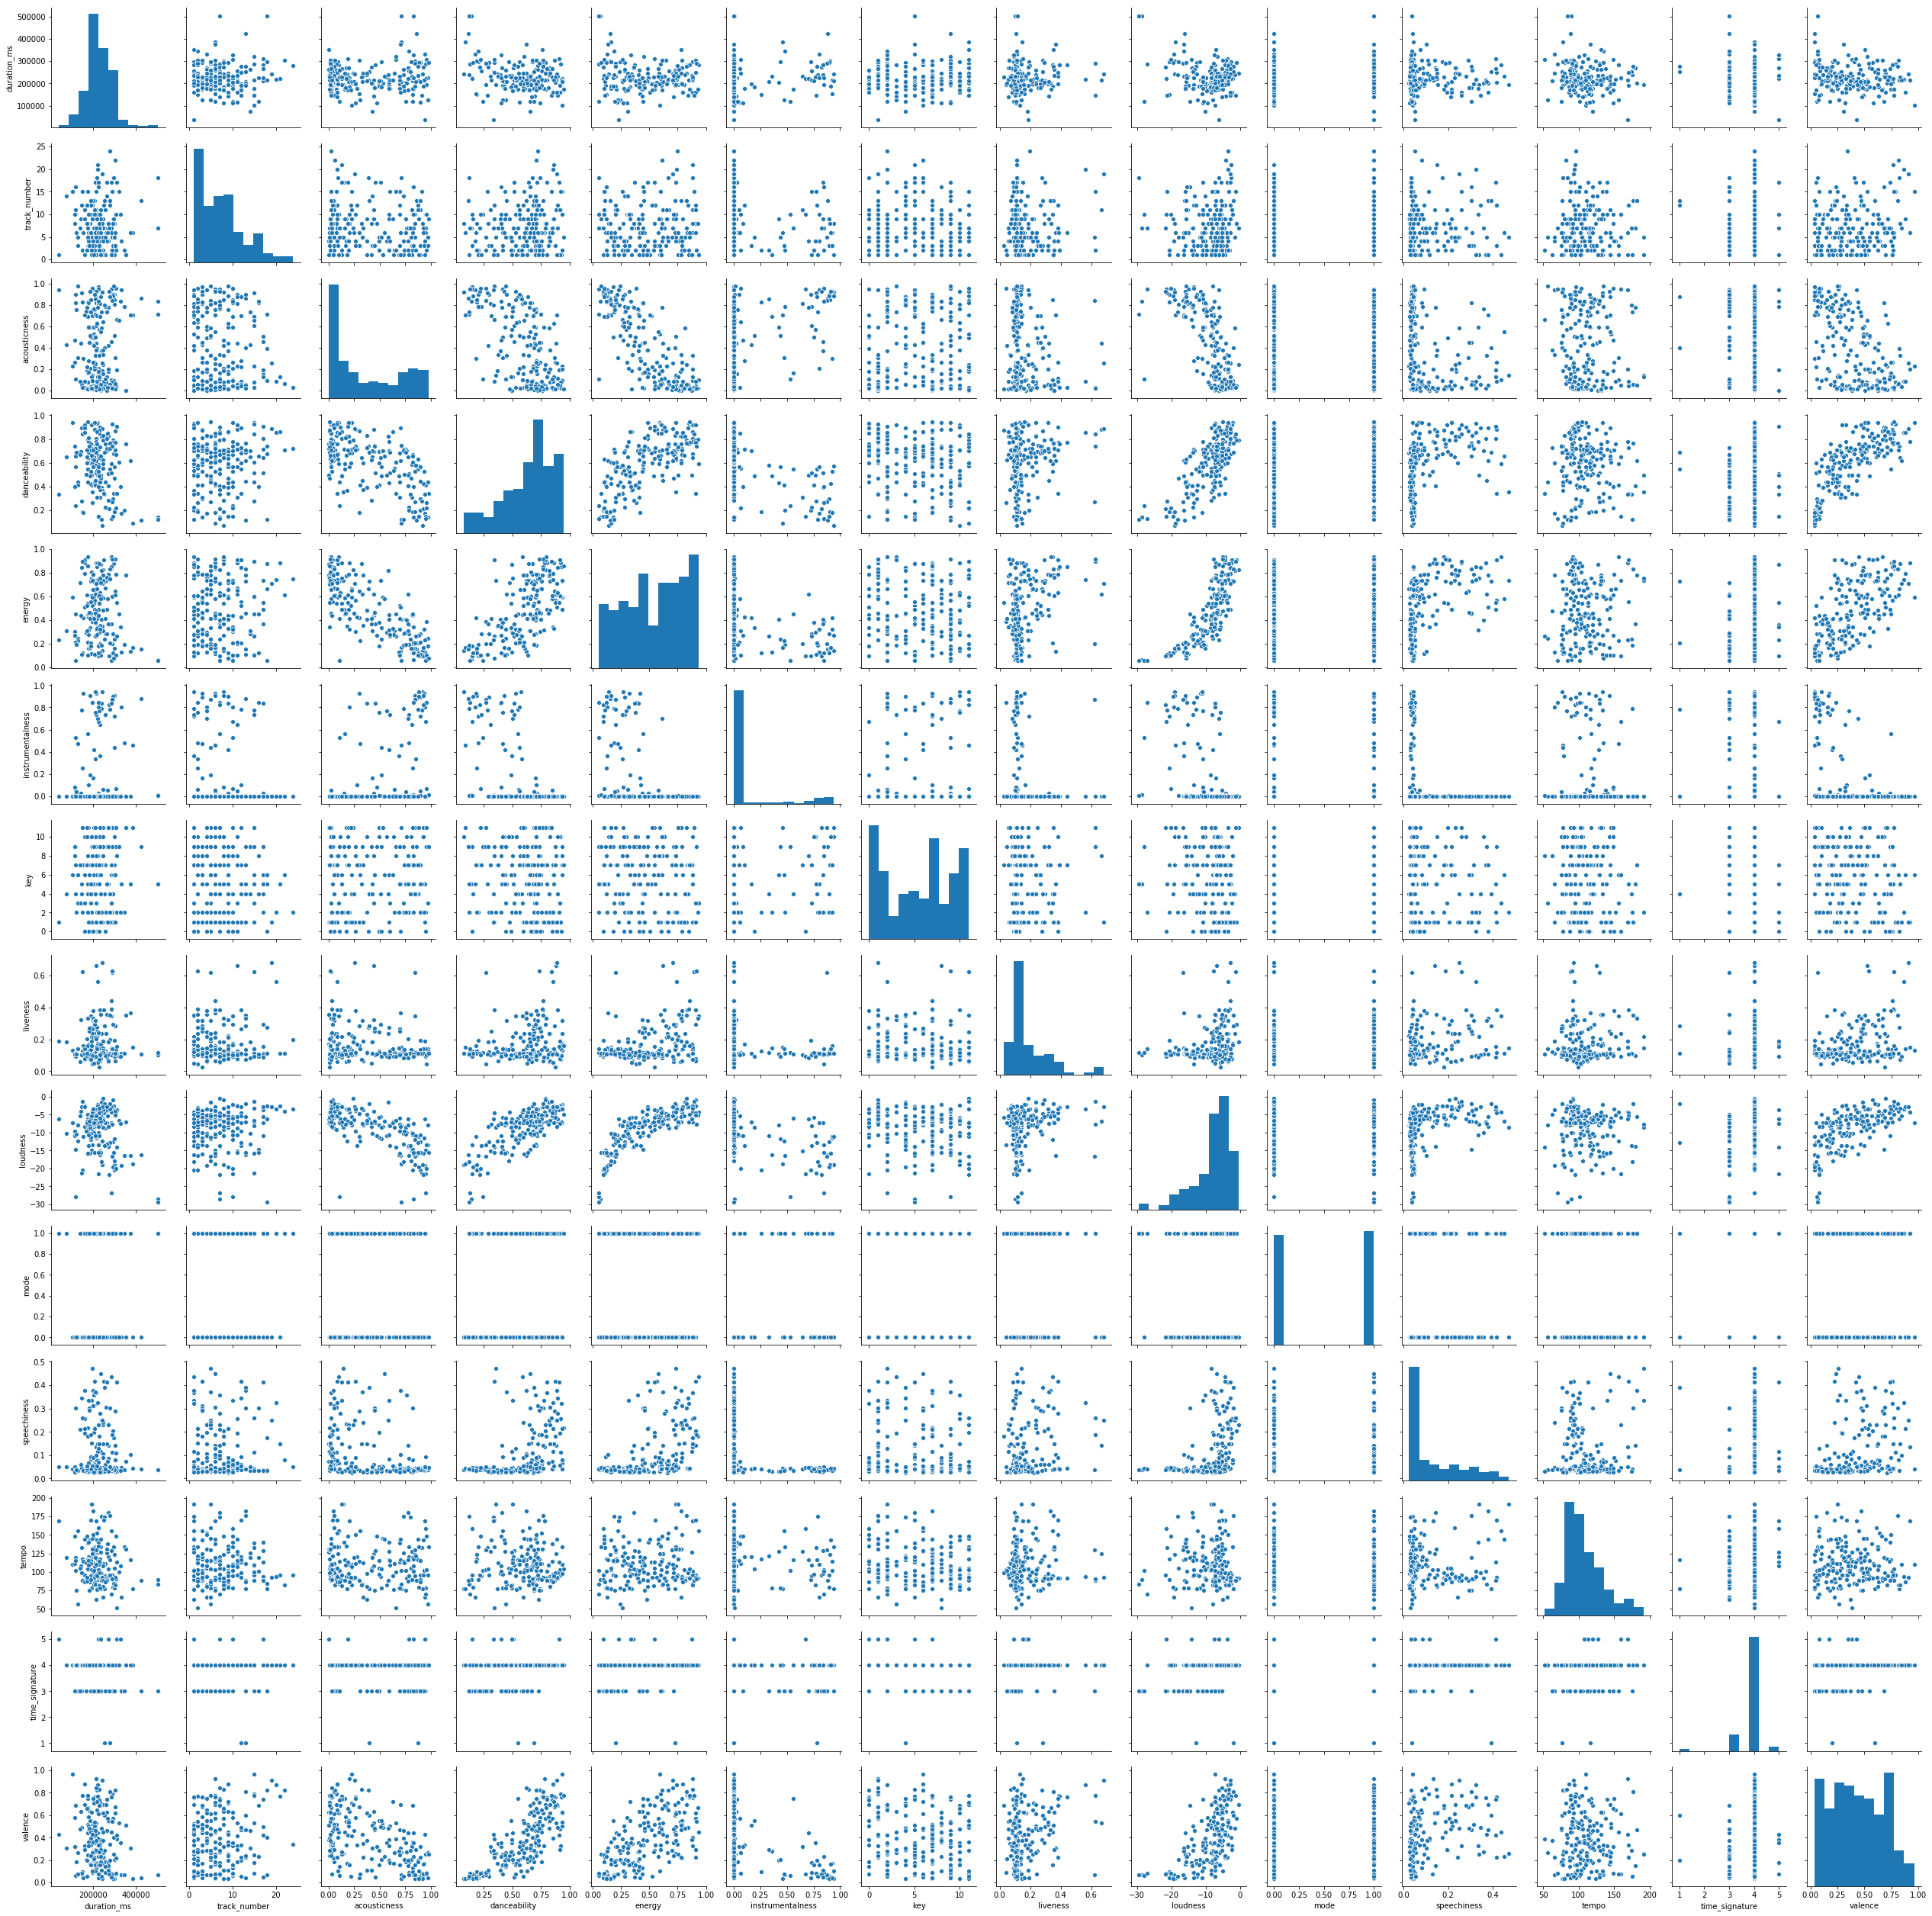

In [9]:
sns.pairplot(X)

## EDA

In [10]:
statistics.mean(list(df.popularity))

45.92